# Problem 1, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 1 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [52]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 1F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 4C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [53]:
def loss(X, Y, w):
    """
    Calculate the squared loss function.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.

    Outputs:
        The loss evaluated with respect to X, Y, and w.
    """

    residuals = np.matmul(X, w) - Y
    squared_loss = np.sum(residuals ** 2)
    mean_squared_loss = squared_loss / len(X)
    return mean_squared_loss


def gradient(x, y, w):
    """
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.

    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.

    Output:
        The gradient of the loss with respect to x, y, and w.
    """

    gradient = 2 * (np.matmul(x, w) - y) * x
    return gradient


def SGD(X, Y, w_start, eta, N_epochs):
    """
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.

    Outputs:
        W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    """

    W = np.zeros((N_epochs, len(w_start)))
    losses = np.zeros(N_epochs)

    w = w_start.copy()
    for epoch in range(N_epochs):
        indices = np.random.permutation(len(X))
        for i in indices:
            w -= eta * gradient(X[i], Y[i], w)

        W[epoch] = w
        losses[epoch] = loss(X, Y, w)

    return W, losses


Next, we need to load the dataset. In doing so, the following function may be helpful:

In [54]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.

    Inputs:
        filename: GeneratorExitiven as a string.

    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=",")

Now, load the dataset in `../data/sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [55]:
# ==============================================
# TODO:
# (1) load the dataset
# (2) run SGD using the given parameters
# (3) print out the final weights.
# ==============================================

dataset = load_data("../data/sgd_data.csv")

# Use first 4 columns as features, then add a bias term to match 5-dim w
x_raw = dataset[:, :4]
bias = np.ones((x_raw.shape[0], 1))
x = np.hstack([x_raw, bias])
y = dataset[:, 4]

w_start = np.array([0.001, 0.001, 0.001, 0.001, 0.001])
eta = np.exp(-15)

N_epochs = 800
W, losses = SGD(x, y, w_start, eta, N_epochs)

print(W[-1])


[ -5.94208968   3.94391644 -11.72382484   8.78570145  -0.22717356]


## Problem 1G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

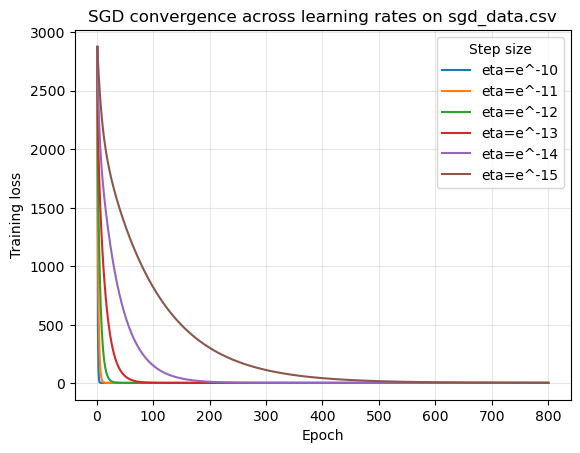

In [56]:
dataset = load_data("../data/sgd_data.csv")
x_raw = dataset[:, :4]
bias = np.ones((x_raw.shape[0], 1))
x = np.hstack([x_raw, bias])
y = dataset[:, 4]

eta_pows = [10, 11, 12, 13, 14, 15]
eta_vals = [np.exp(-p) for p in eta_pows]

N_epochs = 800
w_start_template = np.full(x.shape[1], 0.001, dtype=float)

fig, ax = plt.subplots()
for p, eta in zip(eta_pows, eta_vals):
    W, _ = SGD(x, y, w_start_template.copy(), eta, N_epochs)

    begin_losses = np.empty(N_epochs, dtype=float)
    begin_losses[0] = loss(x, y, w_start_template)
    if N_epochs > 1:
        begin_losses[1:] = [loss(x, y, W[k - 1]) for k in range(1, N_epochs)]

    ax.plot(np.arange(1, N_epochs + 1), begin_losses, label=f"eta=e^-{p}")

ax.set_xlabel("Epoch")
ax.set_ylabel("Training loss")
ax.set_title("SGD convergence across learning rates on sgd_data.csv")
ax.legend(title="Step size")
ax.grid(True, alpha=0.3)

plt.savefig("../images/sgd_convergence_large_data_eta.png", dpi=150, bbox_inches="tight")
plt.show()

## Problem 1H

Provide your code for computing the least-squares analytical solution below.

In [57]:
dataset = load_data("../data/sgd_data.csv")
x_raw = dataset[:, :4]
bias = np.ones((x_raw.shape[0], 1))
X = np.hstack([x_raw, bias])
Y = dataset[:, 4]

def closed_form_w(X, y):
    XtX = X.T @ X
    Xty = X.T @ y
    return np.linalg.solve(XtX, Xty)

# Compute analytical solution
w_closed = closed_form_w(X, Y)

# Run SGD
w_start = np.full(X.shape[1], 0.001)
eta = np.exp(-15)
N_epochs = 800

W, losses = SGD(X, Y, w_start, eta, N_epochs)
w_sgd = W[-1]

print("Final SGD weights:", w_sgd)
print("Closed-form weights:", w_closed)

# Compare results
param_err = np.linalg.norm(w_sgd - w_closed)
pred_err = np.linalg.norm(X @ w_sgd - X @ w_closed)

print("‖w_sgd - w_closed‖ =", param_err)
print("‖Xw_sgd - Xw_closed‖ =", pred_err)


Final SGD weights: [ -5.9421018    3.94390759 -11.72383556   8.78568396  -0.22719006]
Closed-form weights: [ -5.99157048   4.01509955 -11.93325972   8.99061096  -0.31644251]
‖w_sgd - w_closed‖ = 0.31833158703929115
‖Xw_sgd - Xw_closed‖ = 27.479673911001605
